In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.metrics._plot.confusion_matrix import confusion_matrix

from sklearn.model_selection import StratifiedKFold

from sklearn import tree
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [2]:
#Wczytanie danych

root_path = "https://raw.githubusercontent.com/matzim95/ML-datasets/master/"
dataset_name = "iris.csv"
path_to_data = root_path + dataset_name
df_iris = pd.read_csv(path_to_data)

print(df_iris.head(5))

   sepal length  sepal width  petal length  petal width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


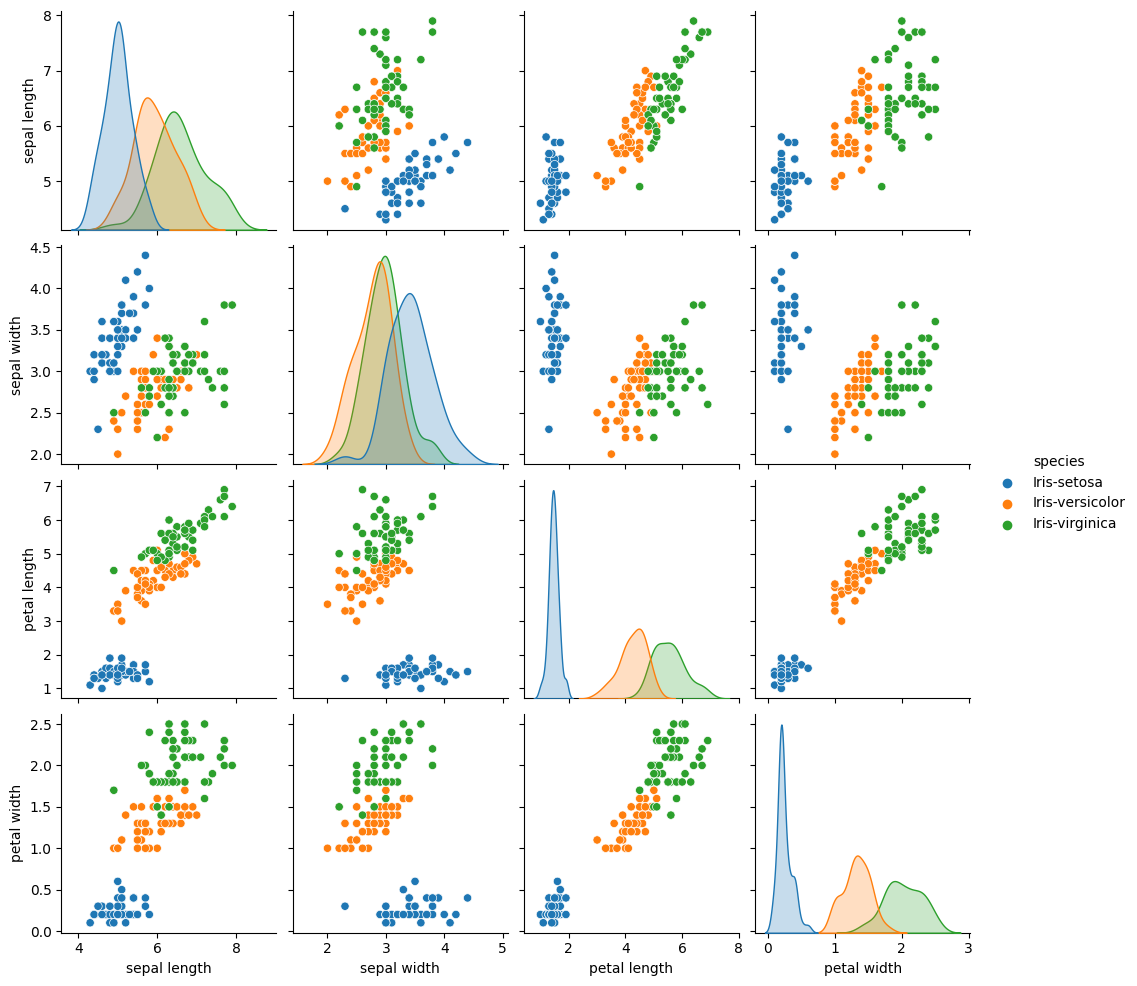

In [3]:
sns.pairplot(data=df_iris, hue="species")
plt.show()

In [4]:
df_features = df_iris[[col for col in df_iris.columns[:-1]]]
df_labels = df_iris["species"]

X = df_features.to_numpy()
Y, classes = pd.factorize(df_labels)

In [5]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for max_depth in range(1,30):
    model_DT = DecisionTreeClassifier(max_depth=max_depth)
    scores = cross_val_score(model_DT, X,Y , cv=cv, scoring="f1_macro")
    print(f"max_depth={max_depth}\tf1={scores.mean().round(3)}+-{scores.std().round(3)}")

max_depth=1	f1=0.556+-0.0
max_depth=2	f1=0.94+-0.025
max_depth=3	f1=0.96+-0.025
max_depth=4	f1=0.953+-0.034
max_depth=5	f1=0.946+-0.027
max_depth=6	f1=0.953+-0.034
max_depth=7	f1=0.953+-0.034
max_depth=8	f1=0.953+-0.034
max_depth=9	f1=0.953+-0.034
max_depth=10	f1=0.953+-0.034
max_depth=11	f1=0.953+-0.034
max_depth=12	f1=0.953+-0.034
max_depth=13	f1=0.953+-0.034
max_depth=14	f1=0.953+-0.034
max_depth=15	f1=0.953+-0.034
max_depth=16	f1=0.953+-0.034
max_depth=17	f1=0.953+-0.034
max_depth=18	f1=0.953+-0.034
max_depth=19	f1=0.953+-0.034
max_depth=20	f1=0.953+-0.034
max_depth=21	f1=0.953+-0.034
max_depth=22	f1=0.953+-0.034
max_depth=23	f1=0.953+-0.034
max_depth=24	f1=0.953+-0.034
max_depth=25	f1=0.953+-0.034
max_depth=26	f1=0.953+-0.034
max_depth=27	f1=0.953+-0.034
max_depth=28	f1=0.953+-0.034
max_depth=29	f1=0.953+-0.034


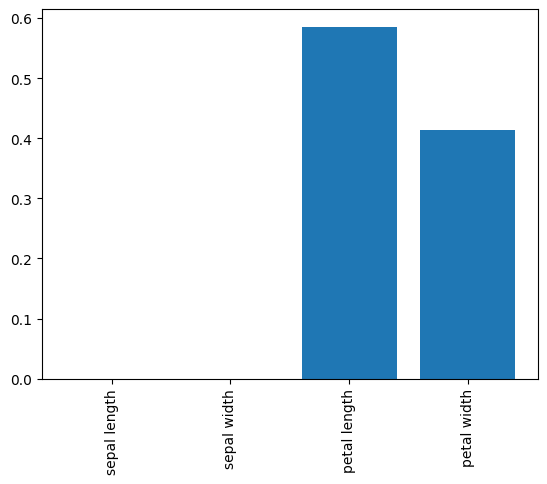

In [6]:
model_DT = DecisionTreeClassifier(max_depth=3, random_state=42)
model_DT.fit(X, Y)

fig,ax = plt.subplots()
ax.bar(x=df_iris.columns[:-1], height=model_DT.feature_importances_)
ax.tick_params(axis="x", labelrotation=90)

In [7]:
df_features = df_iris[[col for col in df_iris.columns if col in ["petal length", "petal width"]]]
df_labels = df_iris["species"]

(150, 2) (150,)


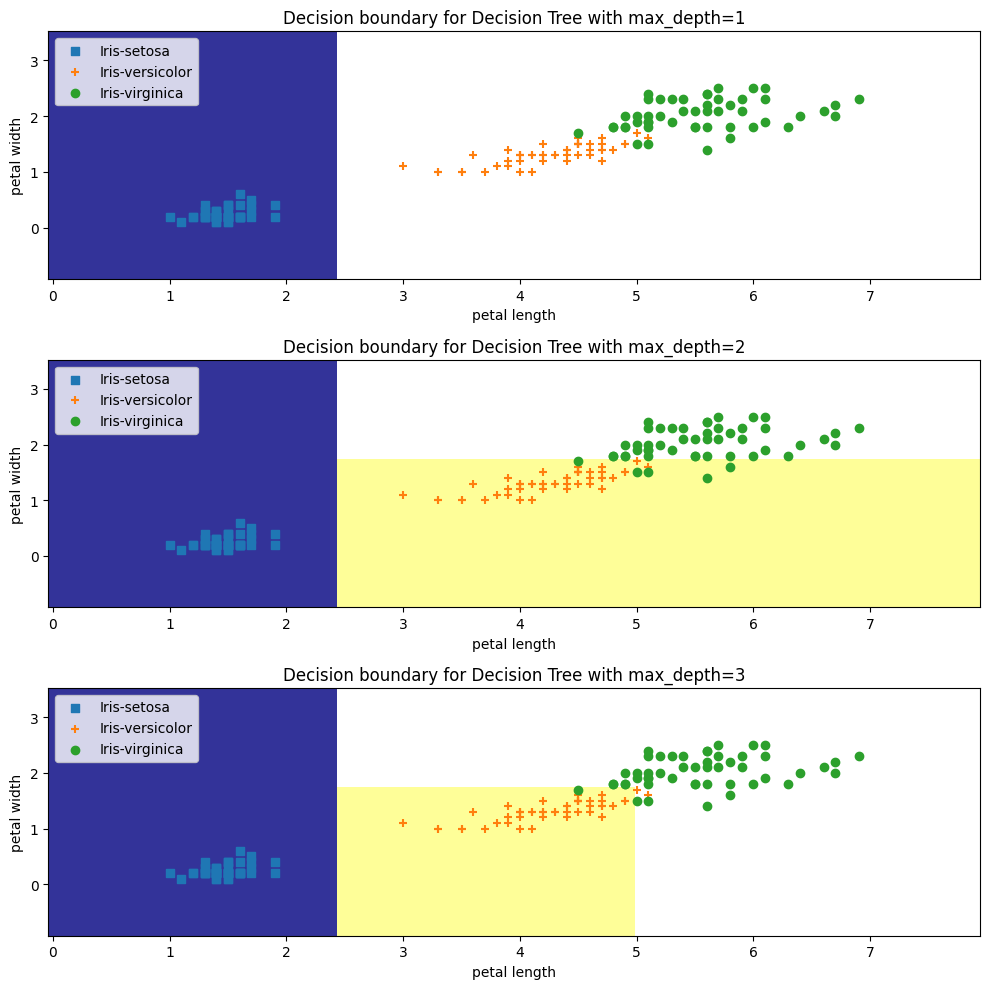

In [8]:
X = df_features.to_numpy()
Y, classes = pd.factorize(df_iris["species"])

print(f"{X.shape} {Y.shape}")

markers = ["s", "+", "o"]
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

fig, ax = plt.subplots(3)

for i, max_depth in enumerate([1, 2, 3]):

  model_DT = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
  model_DT.fit(X, Y)

  DecisionBoundaryDisplay.from_estimator(
      estimator=model_DT,
      X=X,
      ax=ax[i],
      response_method="predict",
      plot_method="pcolormesh",
      shading="auto",
      xlabel="petal length",
      ylabel="petal width",
      eps=1,
      cmap="terrain"
  )

  ax[i].set_title(f"Decision boundary for Decision Tree with max_depth={max_depth}")
  for k in [0, 1, 2]:
    ax[i].scatter(X[:, 0][Y == k], X[:, 1][Y == k], label=labels[k], marker=markers[k])
    ax[i].legend(loc="upper left")

fig.set_size_inches(10, 10)
plt.tight_layout()

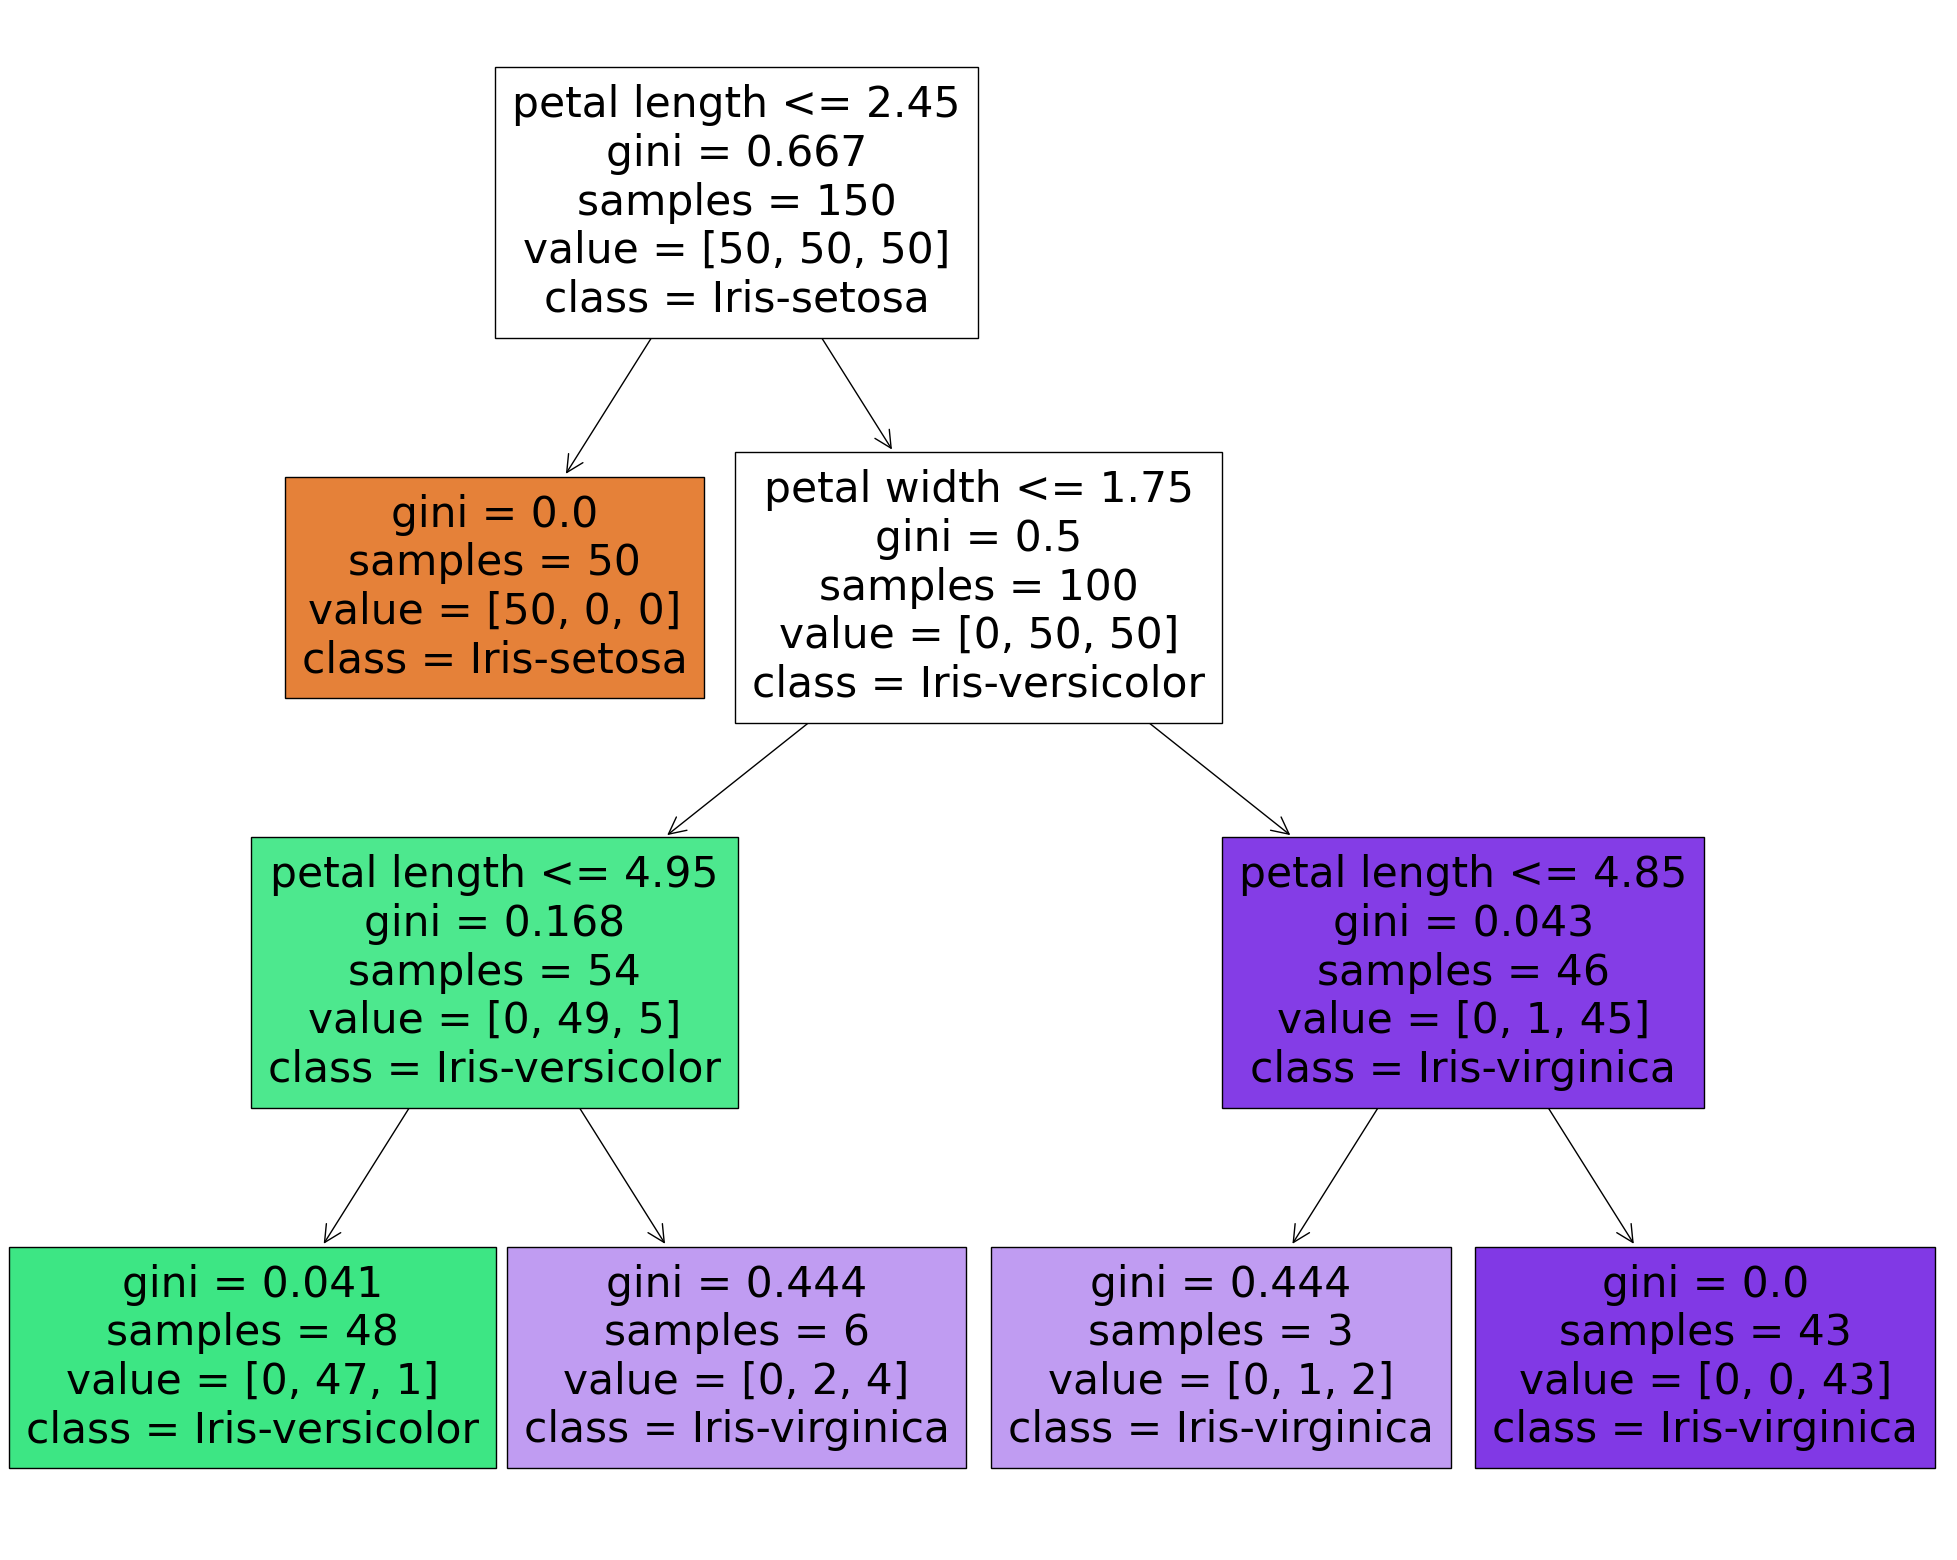

In [9]:
#Wizualizacja drzewa decyzyjnego

fig = plt.figure(figsize=(25,20))

model_DT = DecisionTreeClassifier(max_depth=3, random_state=42)
model_DT.fit(X, Y)

_ = tree.plot_tree(model_DT, feature_names=["petal length", "petal width"], class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], filled=True)